## Data Cleaning and Preperation for Machine Learning

* Perform any data cleaning. Be clear what are you doing, for what feature. 
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [117]:
# load data
try: 
    train = pd.read_csv("Train/proteinas_train.csv")
    test = pd.read_csv("Train/proteinas_test.csv")
    
    print("***** Data loaded successfully *****")
    print(f"Train shape: {train.shape}\nTest shape: {test.shape}\n")

    # Vertify critical columns exist
    required_cols = ['Massa_Molecular', 'Ponto_Isoelétrico', 'Classe']
    assert all(col in train.columns for col in required_cols), "Missing required columns"
except Exception as e:
    print(f"Loading Failed: {str(e)}")

***** Data loaded successfully *****
Train shape: (16000, 10)
Test shape: (4000, 10)



In [118]:
# Numerical features from data
num_features = ['Massa_Molecular', 'Ponto_Isoelétrico', 'Hidrofobicidade', 'Carga_Total', 
                'Proporção_Polar', 'Proporção_Apolar', 'Comprimento_Sequência']

cat_features = ['ID_Proteína', 'Sequência']
target_feature = 'Classe'

In [119]:
# Missing Values
print("Missing Values (Train): ")
print(train[num_features].isnull().sum())

# Class distribution 
print("\nClass distribution (test): ")
print(test['Classe'].value_counts())

Missing Values (Train): 
Massa_Molecular          0
Ponto_Isoelétrico        0
Hidrofobicidade          0
Carga_Total              0
Proporção_Polar          0
Proporção_Apolar         0
Comprimento_Sequência    0
dtype: int64

Class distribution (test): 
Classe
Estrutural    863
Transporte    806
Enzima        792
Receptora     774
Outras        765
Name: count, dtype: int64


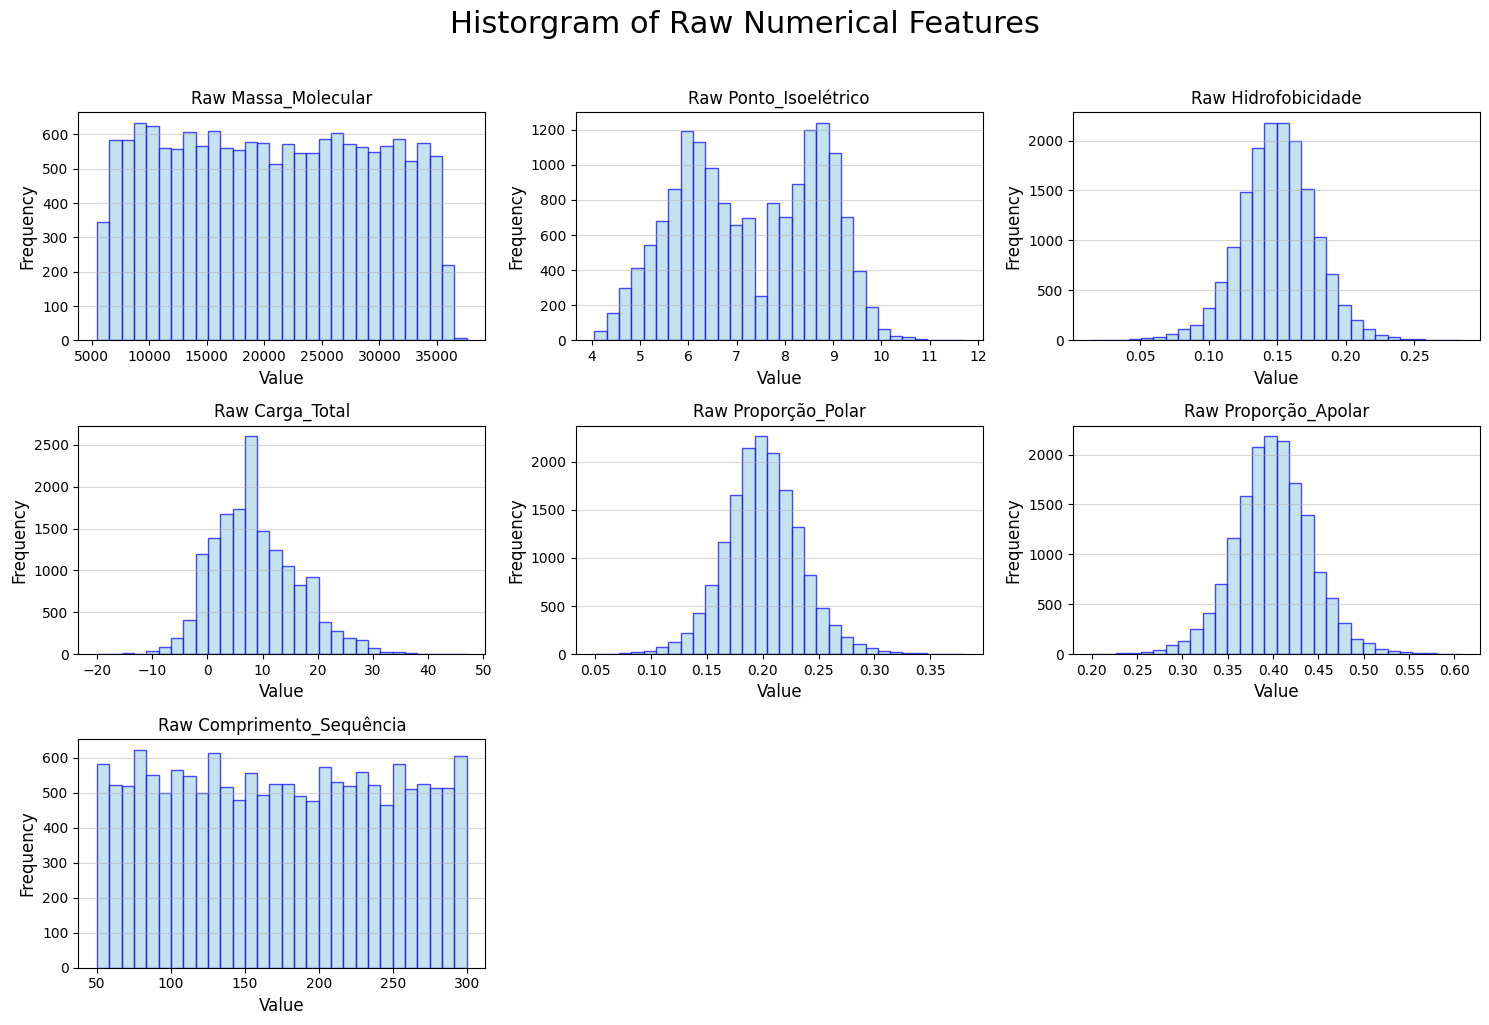

In [140]:
# Visualization of numerical features - pre-cleaning.
plt.figure(figsize=(15,10))
for i, feat in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    plt.hist(train[feat], bins=30, color='lightblue', alpha=0.7, edgecolor='blue')
    plt.ylabel("Frequency", fontsize=12)
    plt.xlabel("Value", fontsize=12)
    plt.grid(axis='y', alpha=0.5)
    plt.title(f'Raw {feat}')

plt.suptitle("Historgram of Raw Numerical Features", y =1.02, fontsize=22)
plt.tight_layout()
plt.show()

In [121]:
from sklearn.impute import SimpleImputer

# Handles missing values - using median for numerical
imputer = SimpleImputer(strategy = 'median')
train[num_features] = imputer.fit_transform(train[num_features])
test[num_features] = imputer.transform(test[num_features])

In [122]:
# Validate sequence lengths
train['Seq_length_check'] = train['Sequência'].str.len() == train['Comprimento_Sequência']
test['Seq_length_check'] = test['Sequência'].str.len() == test['Comprimento_Sequência']

print(f"Mismatched sequence lengths: Train={(train['Seq_length_check'] == False).sum()}, Test={(test['Seq_length_check']== False).sum()}") 

Mismatched sequence lengths: Train=0, Test=0


In [123]:
# Removing temporary column
train.drop('Seq_length_check', axis=1, inplace = True)
test.drop('Seq_length_check', axis=1, inplace = True)

In [124]:
# Scale numerical features - Standard for ML models
scaler = StandardScaler()

# Creat copies to avoid modifying the original DF. 
test_scaled = test.copy() 
train_scaled = train.copy()

# fit the scaler on to the training data and transforms training and test data.
train_scaled[num_features] = scaler.fit_transform(train[num_features])
test_scaled[num_features] = scaler.transform(test[num_features])

print("Numerical features rescaled using StandardScaler.")

Numerical features rescaled using StandardScaler.


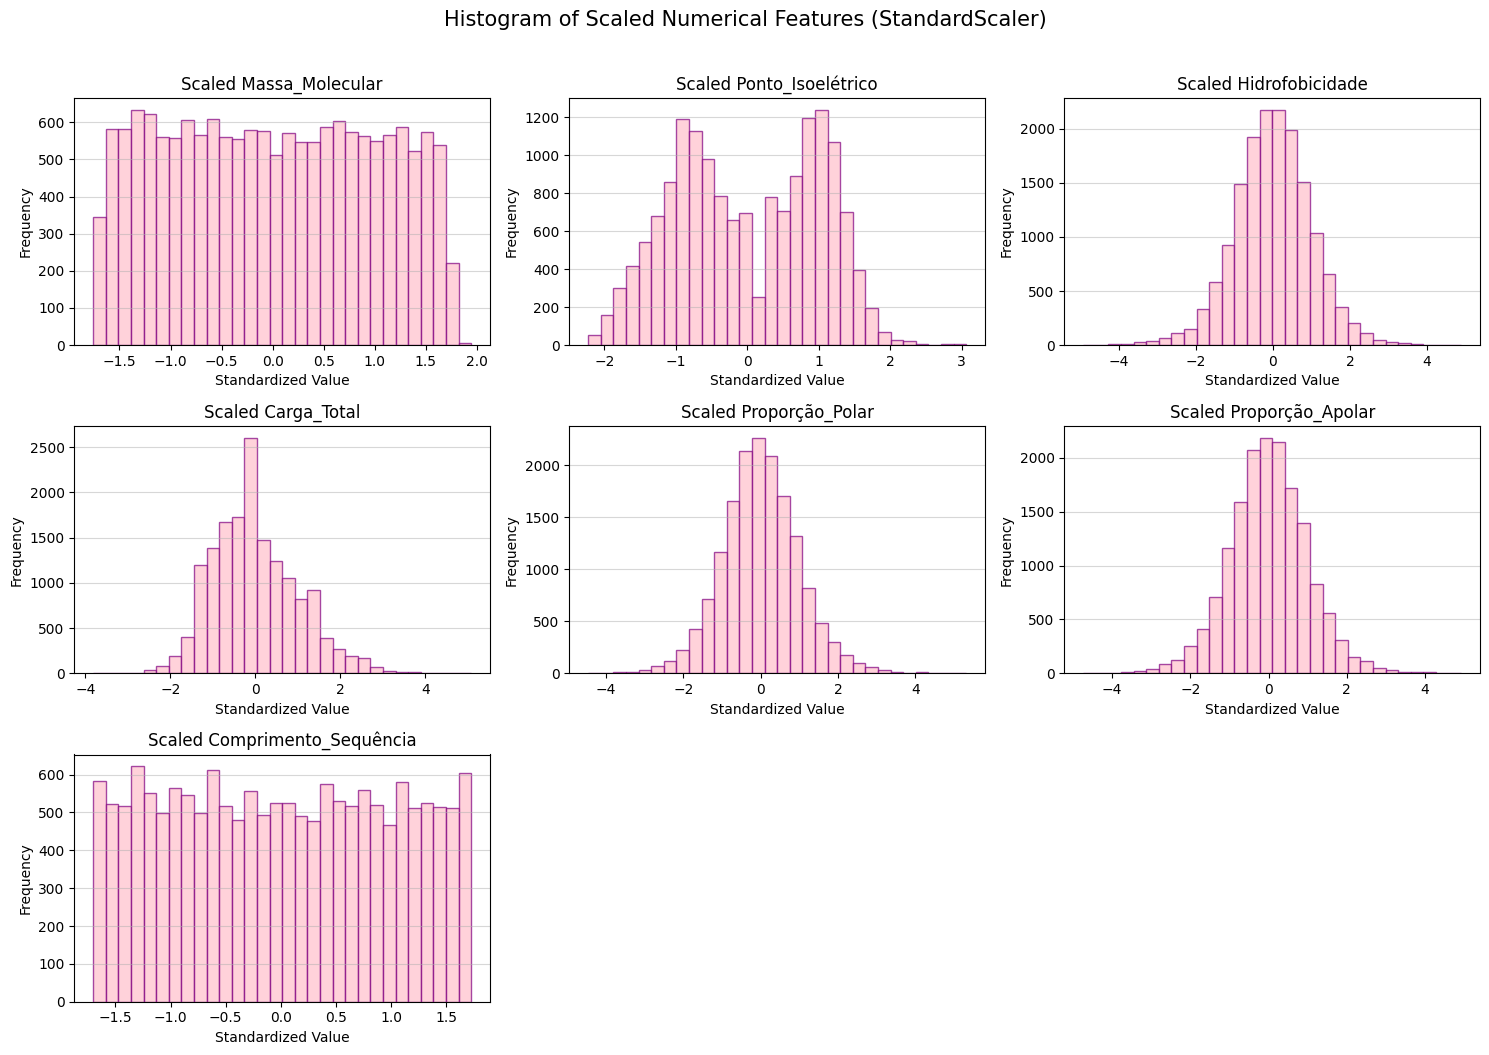

In [143]:
# visualization of scaling effect
plt.figure(figsize=(15,10))

for i, feat in enumerate(num_features, 1):
    
    plt.subplot(3, 3, i)
    plt.hist(train_scaled[feat], bins=30, color='pink', alpha=0.7, edgecolor='purple')
    plt.title (f"Scaled {feat}", fontsize=12)
    plt.xlabel("Standardized Value", fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.grid(axis='y', alpha=0.5)
       
plt.tight_layout()
plt.suptitle("Histogram of Scaled Numerical Features (StandardScaler)", y=1.05, fontsize=15)
plt.show()

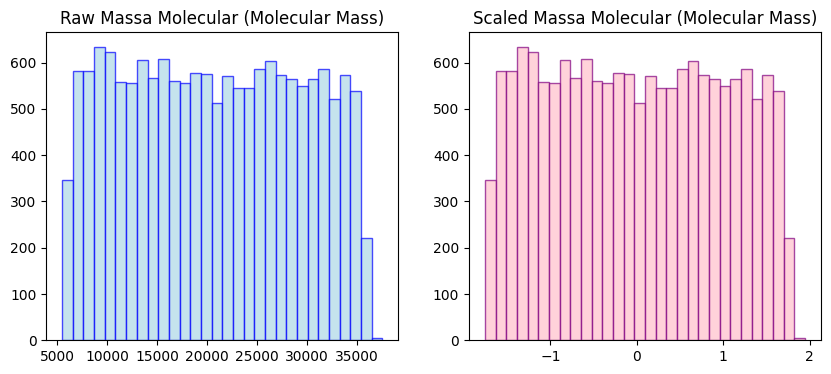

In [125]:
# visualization of scaling effect
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(train['Massa_Molecular'], bins=30, color='lightblue', alpha=0.7, edgecolor='blue')
title1 = plt.title("Raw Massa Molecular (Molecular Mass)")

plt.subplot(1,2,2)
plt.hist(train_scaled['Massa_Molecular'], bins=30, color='pink', alpha=0.7, edgecolor='purple')
title2 = plt.title("Scaled Massa Molecular (Molecular Mass)")

- Compares the scale of the 'Raw' and 'Scaled' histograms.

In [155]:
from sklearn.preprocessing import OneHotEncoder

# encode 'Classe' - non-binary 
if train['Classe'].nunique() > 2: # Checks the number of unique classes
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    train_encoded_classe = pd.DataFrame(encoder.fit_transform(train[['Classe']]),
                                        columns=encoder.get_feature_names_out(['Classe']))
    test_encoded_classe = pd.DataFrame(encoder.fit_transform(train[['Classe']]),
                                        columns=encoder.get_feature_names_out(['Classe']))

    # Concatenate the encoded target with scaled features.
    train_final = pd.concat([train_scaled.drop(target_feature, axis=1), train_encoded_classe], axis=1)
    test_final = pd.concat([test_scaled.drop(target_feature, axis=1), test_encoded_classe], axis=1)

    print("Target feature ('Classe') One-Hot encoded analysis/visualization.")
    print("\nFinal train columns: ", train_final.columns)
    print("\nFinal test columns: ", test_final.columns)

else: 
    # Binary classification 
    train_final = train_scaled.copy()
    test_final = test_scaled.copy()
    
    print("Target feature ('Classe') is binary (One-Hot encoded not applied for modeling).")
    print("\nFinal train columns: ", train_final.columns)
    print("\nFinal test columns: ", test_final.columns)

Target feature ('Classe') One-Hot encoded analysis/visualization.

Final train columns:  Index(['ID_Proteína', 'Sequência', 'Massa_Molecular', 'Ponto_Isoelétrico',
       'Hidrofobicidade', 'Carga_Total', 'Proporção_Polar', 'Proporção_Apolar',
       'Comprimento_Sequência', 'Classe_Estrutural', 'Classe_Outras',
       'Classe_Receptora', 'Classe_Transporte'],
      dtype='object')

Final test columns:  Index(['ID_Proteína', 'Sequência', 'Massa_Molecular', 'Ponto_Isoelétrico',
       'Hidrofobicidade', 'Carga_Total', 'Proporção_Polar', 'Proporção_Apolar',
       'Comprimento_Sequência', 'Classe_Estrutural', 'Classe_Outras',
       'Classe_Receptora', 'Classe_Transporte'],
      dtype='object')
